In [1]:
import matplotlib
#matplotlib.use('Agg')
from path_data_variable import *
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [2]:
banknotes = Table.read_table(path_data + 'banknote.csv')
banknotes

WaveletVar | WaveletSkew | WaveletCurt | Entropy  | Class
3.6216     | 8.6661      | -2.8073     | -0.44699 | 0
4.5459     | 8.1674      | -2.4586     | -1.4621  | 0
3.866      | -2.6383     | 1.9242      | 0.10645  | 0
3.4566     | 9.5228      | -4.0112     | -3.5944  | 0
0.32924    | -4.4552     | 4.5718      | -0.9888  | 0
4.3684     | 9.6718      | -3.9606     | -3.1625  | 0
3.5912     | 3.0129      | 0.72888     | 0.56421  | 0
2.0922     | -6.81       | 8.4636      | -0.60216 | 0
3.2032     | 5.7588      | -0.75345    | -0.61251 | 0
1.5356     | 9.1772      | -2.2718     | -0.73535 | 0
... (1362 rows omitted)

In [3]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)

In [4]:
banknotes = banknotes.join('Class', color_table)

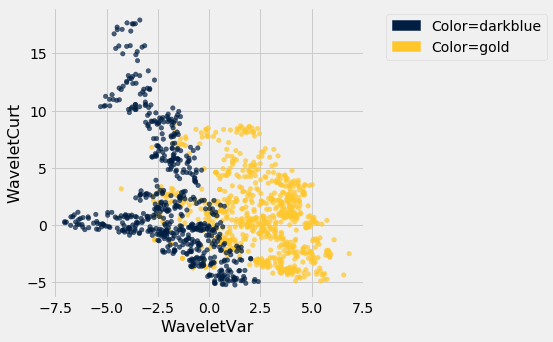

In [5]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Color')

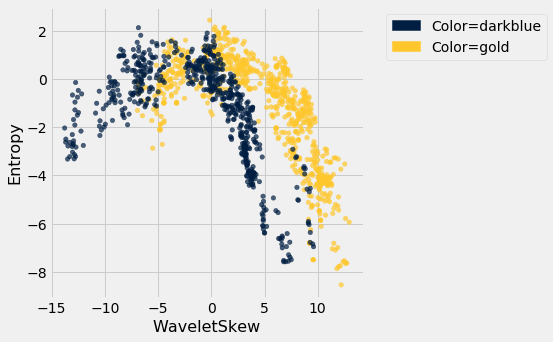

In [6]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Color')

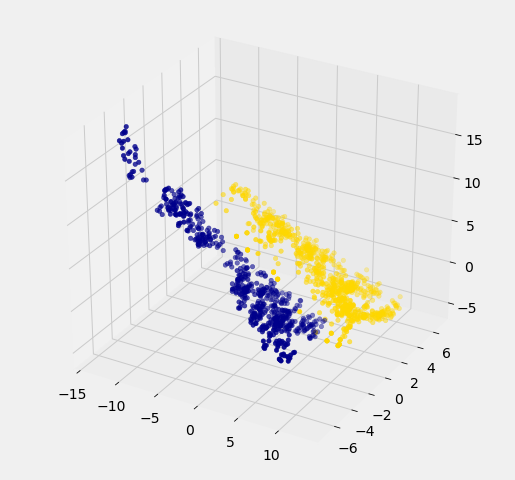

In [7]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Color'));

In [8]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

In [9]:
wine = Table.read_table(path_data + 'wine.csv')

# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))

In [10]:
wine

Class | Alcohol | Malic Acid | Ash  | Alcalinity of Ash | Magnesium | Total Phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color Intensity | Hue  | OD280/OD315 of diulted wines | Proline
1     | 14.23   | 1.71       | 2.43 | 15.6              | 127       | 2.8           | 3.06       | 0.28                 | 2.29            | 5.64            | 1.04 | 3.92                         | 1065
1     | 13.2    | 1.78       | 2.14 | 11.2              | 100       | 2.65          | 2.76       | 0.26                 | 1.28            | 4.38            | 1.05 | 3.4                          | 1050
1     | 13.16   | 2.36       | 2.67 | 18.6              | 101       | 2.8           | 3.24       | 0.3                  | 2.81            | 5.68            | 1.03 | 3.17                         | 1185
1     | 14.37   | 1.95       | 2.5  | 16.8              | 113       | 3.85          | 3.49       | 0.24                 | 2.18            | 7.8             | 0.86 | 3.45                         | 1480
1     | 13.24   | 2.59       | 2.87 | 21                | 118       | 2.8           | 2.69       | 0.39                 | 1.82            | 4.32            | 1.04 | 2.93                         | 735
1     | 14.2    | 1.76       | 2.45 | 15.2              | 112       | 3.27          | 3.39       | 0.34                 | 1.97            | 6.75            | 1.05 | 2.85                         | 1450
1     | 14.39   | 1.87       | 2.45 | 14.6              | 96        | 2.5           | 2.52       | 0.3                  | 1.98            | 5.25            | 1.02 | 3.58                         | 1290
1     | 14.06   | 2.15       | 2.61 | 17.6              | 121       | 2.6           | 2.51       | 0.31                 | 1.25            | 5.05            | 1.06 | 3.58                         | 1295
1     | 14.83   | 1.64       | 2.17 | 14                | 97        | 2.8           | 2.98       | 0.29                 | 1.98            | 5.2             | 1.08 | 2.85                         | 1045
1     | 13.86   | 1.35       | 2.27 | 16                | 98        | 2.98          | 3.15       | 0.22                 | 1.85            | 7.22            | 1.01 | 3.55                         | 1045
... (168 rows omitted)

In [11]:
wine_attributes = wine.drop('Class')

In [12]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(1)))

31.265012394048398

In [13]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(177)))

506.05936766351834

In [14]:
wine_with_colors = wine.join('Class', color_table)

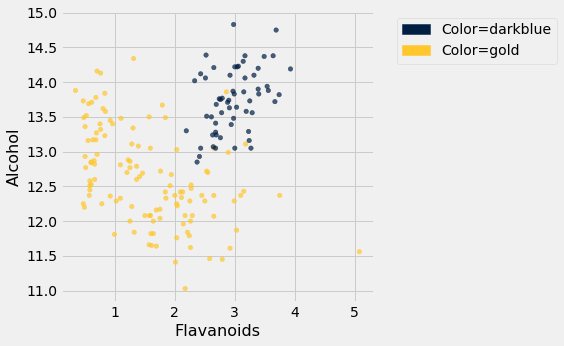

In [15]:
wine_with_colors.scatter('Flavanoids', 'Alcohol', group='Color')

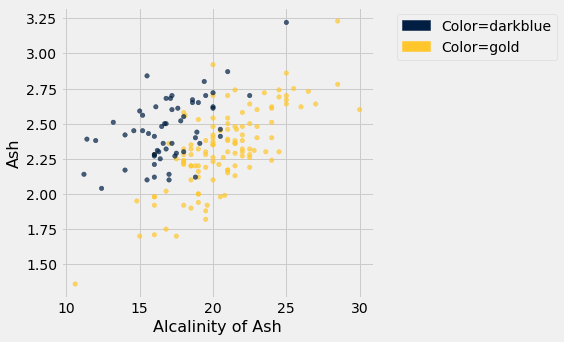

In [16]:
wine_with_colors.scatter('Alcalinity of Ash', 'Ash', group='Color')

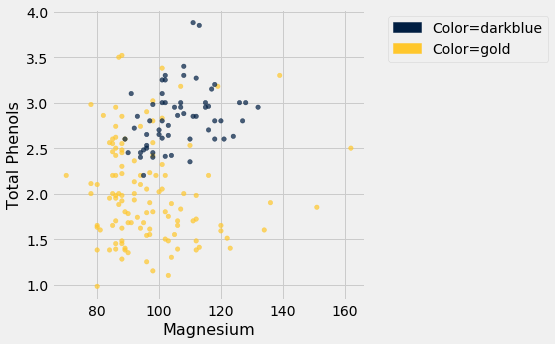

In [17]:
wine_with_colors.scatter('Magnesium', 'Total Phenols', group='Color')

In [18]:
def closest(training, p, k):
    ...

def majority(topkclasses):
    ...

def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest.select('Class')
    return majority(kclosest)

In [19]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [20]:
special_wine = wine.drop('Class').row(0)

In [21]:
closest(wine, special_wine, 5)

Class | Alcohol | Malic Acid | Ash  | Alcalinity of Ash | Magnesium | Total Phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color Intensity | Hue  | OD280/OD315 of diulted wines | Proline | Distance
1     | 14.23   | 1.71       | 2.43 | 15.6              | 127       | 2.8           | 3.06       | 0.28                 | 2.29            | 5.64            | 1.04 | 3.92                         | 1065    | 0
1     | 13.74   | 1.67       | 2.25 | 16.4              | 118       | 2.6           | 2.9        | 0.21                 | 1.62            | 5.85            | 0.92 | 3.2                          | 1060    | 10.3928
1     | 14.21   | 4.04       | 2.44 | 18.9              | 111       | 2.85          | 2.65       | 0.3                  | 1.25            | 5.24            | 0.87 | 3.33                         | 1080    | 22.3407
1     | 14.1    | 2.02       | 2.4  | 18.8              | 103       | 2.75          | 2.92       | 0.32                 | 2.38            | 6.2             | 1.07 | 2.75                         | 1060    | 24.7602
1     | 14.38   | 3.59       | 2.28 | 16                | 102       | 3.25          | 3.17       | 0.27                 | 2.19            | 4.9             | 1.04 | 3.44                         | 1065    | 25.0947

In [22]:
def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [23]:
classify(wine, special_wine, 5)

1

In [24]:
special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

0